In [60]:
from prophet import Prophet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
data = pd.read_csv("C:/Users/USER/Downloads/openmeteo.csv", delimiter=";", encoding="ISO-8859-1")

In [62]:
data.columns

Index(['Ville', 'date', 'temperature_2m_max (øC)', 'temperature_2m_min (øC)',
       'temperature_2m_mean (øC)', 'apparent_temperature_max (øC)',
       'sunshine_duration (s)', 'precipitation_sum (mm)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'shortwave_radiation_sum (MJ/mý)', 'et0_fao_evapotranspiration (mm)',
       'canicule ou pas'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ville                            3653 non-null   object
 1   date                             3653 non-null   object
 2   temperature_2m_max (øC)          3653 non-null   object
 3   temperature_2m_min (øC)          3653 non-null   object
 4   temperature_2m_mean (øC)         3653 non-null   object
 5   apparent_temperature_max (øC)    3653 non-null   object
 6   sunshine_duration (s)            3653 non-null   object
 7   precipitation_sum (mm)           3653 non-null   object
 8   wind_speed_10m_max (km/h)        3653 non-null   object
 9   wind_gusts_10m_max (km/h)        3653 non-null   object
 10  shortwave_radiation_sum (MJ/mý)  3653 non-null   object
 11  et0_fao_evapotranspiration (mm)  3653 non-null   object
 12  canicule ou pas                  3

In [64]:
data.isnull().sum()

Ville                              0
date                               0
temperature_2m_max (øC)            0
temperature_2m_min (øC)            0
temperature_2m_mean (øC)           0
apparent_temperature_max (øC)      0
sunshine_duration (s)              0
precipitation_sum (mm)             0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
shortwave_radiation_sum (MJ/mý)    0
et0_fao_evapotranspiration (mm)    0
canicule ou pas                    0
dtype: int64

In [65]:
# Afficher les premières lignes du DataFrame
print("Données brutes :")
print(data.head())

# Créer une copie de la trame de données
cleaned_data = data.copy()

# Nettoyage des données
# Supprimer les lignes avec des valeurs manquantes
cleaned_data.dropna(inplace=True)

# Convertir les types de données si nécessaire (par exemple, convertir les dates en type datetime)
# Note: Le format de la date semble être différent, nous devons spécifier le bon format
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%Y-%m-%dT%H:%M').dt.strftime('%d-%m-%Y')

# Supprimer les colonnes non pertinentes
cleaned_data.drop(['wind_speed_10m_max (km/h)', 'et0_fao_evapotranspiration (mm)'], axis=1, inplace=True)

# Renommer les colonnes pour les rendre plus lisibles
cleaned_data.rename(columns={'temperature_2m_max (øC)': 'max_temperature', 
                             'temperature_2m_min (øC)': 'min_temperature',
                             'temperature_2m_mean (øC)': 'moy_temperature',
                             'apparent_temperature_max (øC)': 'max_apparent_temperature',
                             'sunshine_duration (s)': 'sunshine_duration_seconds',
                             'precipitation_sum (mm)': 'precipitation_sum_mm',
                             'wind_gusts_10m_max (km/h)': 'max_wind_gusts_km_h',
                             'shortwave_radiation_sum (MJ/mý)': 'shortwave_radiation_sum_MJ_m2',
                             'canicule ou pas': 'canicule',
                             'date':'ds'}, inplace=True)

# Réindexer le DataFrame après les modifications
cleaned_data.reset_index(drop=True, inplace=True)

# Afficher les données après nettoyage
print("\nDonnées après nettoyage :")
print(cleaned_data.head())

Données brutes :
  Ville              date temperature_2m_max (øC) temperature_2m_min (øC)  \
0  Lyon  2014-01-01T00:00                    10,9                     5,4   
1  Lyon  2014-01-02T00:00                    12,6                     7,4   
2  Lyon  2014-01-03T00:00                    11,7                     7,5   
3  Lyon  2014-01-04T00:00                    11,4                     6,8   
4  Lyon  2014-01-05T00:00                     8,2                     2,2   

  temperature_2m_mean (øC) apparent_temperature_max (øC)  \
0                      8,1                           6,8   
1                       10                          10,4   
2                      9,5                           9,1   
3                      9,5                           8,7   
4                        6                           6,2   

  sunshine_duration (s) precipitation_sum (mm) wind_speed_10m_max (km/h)  \
0              21562,48                    0,2                      30,3   
1      

In [66]:
# Nettoyage des données
cleaned_data = data.copy()

# Supprimer les lignes avec des valeurs manquantes
cleaned_data.dropna(inplace=True)

# Convertir les types de données si nécessaire (par exemple, convertir les dates en type datetime)
cleaned_data['ds'] = pd.to_datetime(cleaned_data['date'], format='%Y-%m-%dT%H:%M')
cleaned_data.drop('date', axis=1, inplace=True)

# Supprimer les colonnes non pertinentes
cleaned_data.drop(['wind_speed_10m_max (km/h)', 'et0_fao_evapotranspiration (mm)'], axis=1, inplace=True)

# Renommer les colonnes pour les rendre plus lisibles
cleaned_data.rename(columns={'temperature_2m_mean (øC)': 'y'}, inplace=True)
cleaned_data['y'] = cleaned_data['y'].str.replace(',', '.').astype(float)

# Réindexer le DataFrame après les modifications
cleaned_data.reset_index(drop=True, inplace=True)

# Afficher les données après nettoyage
print("\nDonnées après nettoyage :")
# Afficher la date au format "jour-mois-année"

print(cleaned_data.head())



Données après nettoyage :
  Ville temperature_2m_max (øC) temperature_2m_min (øC)     y  \
0  Lyon                    10,9                     5,4   8.1   
1  Lyon                    12,6                     7,4  10.0   
2  Lyon                    11,7                     7,5   9.5   
3  Lyon                    11,4                     6,8   9.5   
4  Lyon                     8,2                     2,2   6.0   

  apparent_temperature_max (øC) sunshine_duration (s) precipitation_sum (mm)  \
0                           6,8              21562,48                    0,2   
1                          10,4              19423,72                    8,6   
2                           9,1              11954,92                    6,5   
3                           8,7                651,42                   15,4   
4                           6,2              27117,32                    5,9   

  wind_gusts_10m_max (km/h) shortwave_radiation_sum (MJ/mý)  canicule ou pas  \
0                    

21:42:31 - cmdstanpy - INFO - Chain [1] start processing
21:42:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


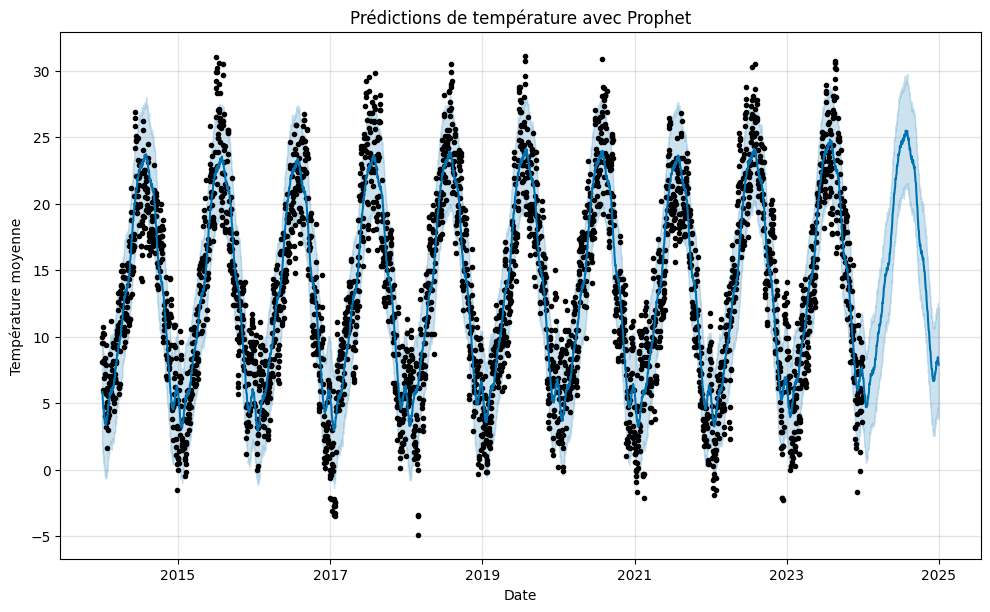

In [67]:
import matplotlib.pyplot as plt
model = Prophet()
model.fit(cleaned_data)

# Prédire les températures pour les prochains jours
future_dates = model.make_future_dataframe(periods=365)  
forecast = model.predict(future_dates)

# Visualiser les prédictions
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Température moyenne')
plt.title('Prédictions de température avec Prophet')
plt.show()

In [68]:
print(cleaned_data.tail())

     Ville temperature_2m_max (øC) temperature_2m_min (øC)    y  \
3648  Lyon                    11,6                     4,3  7.8   
3649  Lyon                      12                     3,3  8.3   
3650  Lyon                     8,7                     2,3  5.2   
3651  Lyon                      11                     4,2  8.5   
3652  Lyon                     9,6                     2,5  5.5   

     apparent_temperature_max (øC) sunshine_duration (s)  \
3648                           8,7              14502,89   
3649                          10,8              25567,16   
3650                           7,6              25276,17   
3651                           7,6               1209,67   
3652                           6,9              21304,63   

     precipitation_sum (mm) wind_gusts_10m_max (km/h)  \
3648                      0                        49   
3649                    0,4                      30,2   
3650                      0                      26,6   
3651    

In [69]:
# Créer un DataFrame pour les mois suivants à prédire
future_dates = pd.date_range(start='01-02-2024', end='01-12-2025', freq='D')


# Créer un DataFrame avec les dates pour prédire la température moyenne
future_df = pd.DataFrame({'ds': future_dates})

# Utiliser le modèle Prophet pour prédire la température moyenne
forecast = model.predict(future_df)

# Afficher les prédictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Analyser les prédictions pour détecter la présence de canicules
# Par exemple, vous pouvez définir un seuil pour la température et identifier les jours où la température prédite dépasse ce seuil
# Sauvegarder les prédictions dans un fichier Excel
#forecast.to_excel('predictions.xlsx', index=False)

            ds      yhat  yhat_lower  yhat_upper
0   2024-01-02  7.033971    3.143972   11.195435
1   2024-01-03  6.858084    2.831807   10.865538
2   2024-01-04  6.862401    2.905340   10.750831
3   2024-01-05  6.857519    2.756932   10.743750
4   2024-01-06  6.475106    2.565127   10.589925
..         ...       ...         ...         ...
372 2025-01-08  6.518017    2.552243   10.491662
373 2025-01-09  6.496230    2.700887   10.599059
374 2025-01-10  6.484910    2.556675   10.499294
375 2025-01-11  6.115918    2.053386    9.952468
376 2025-01-12  5.891584    1.831719    9.995361

[377 rows x 4 columns]


In [70]:
# Filtrer les jours de canicule
jours_de_canicule = forecast[forecast['yhat'] > 25]

# Afficher les jours de canicule
print("Jours de canicule :\n", jours_de_canicule)

Jours de canicule :
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
199 2024-07-19  15.011327   20.999283   29.157895    14.963967    15.061605   
200 2024-07-20  15.013224   20.888330   29.203559    14.965358    15.063789   
201 2024-07-21  15.015121   21.187229   29.075049    14.966768    15.065873   
202 2024-07-22  15.017018   21.364878   29.334459    14.968335    15.067938   
203 2024-07-23  15.018916   21.307486   29.117937    14.969902    15.069979   
204 2024-07-24  15.020813   21.267264   28.992472    14.971469    15.072020   
205 2024-07-25  15.022710   21.274655   29.303110    14.972852    15.074062   
206 2024-07-26  15.024608   21.680603   29.711113    14.974240    15.076456   
207 2024-07-27  15.026505   21.487926   29.238138    14.975629    15.079162   
208 2024-07-28  15.028402   21.451929   29.128084    14.977078    15.081868   
209 2024-07-29  15.030300   21.428293   29.445446    14.978672    15.084360   
210 2024-07-30  15.032197   21.

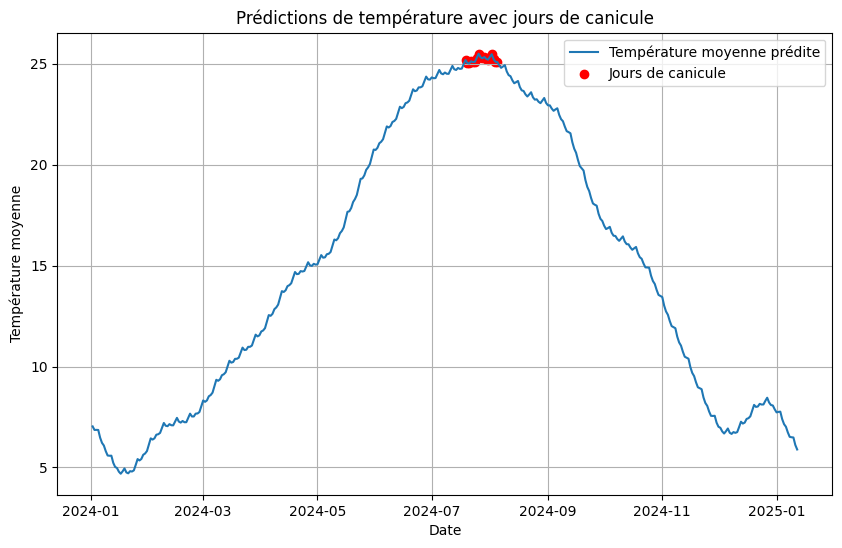

In [71]:
# Créer un graphique pour visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Température moyenne prédite')
plt.scatter(jours_de_canicule['ds'], jours_de_canicule['yhat'], color='red', label='Jours de canicule')
plt.xlabel('Date')
plt.ylabel('Température moyenne')
plt.title('Prédictions de température avec jours de canicule')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

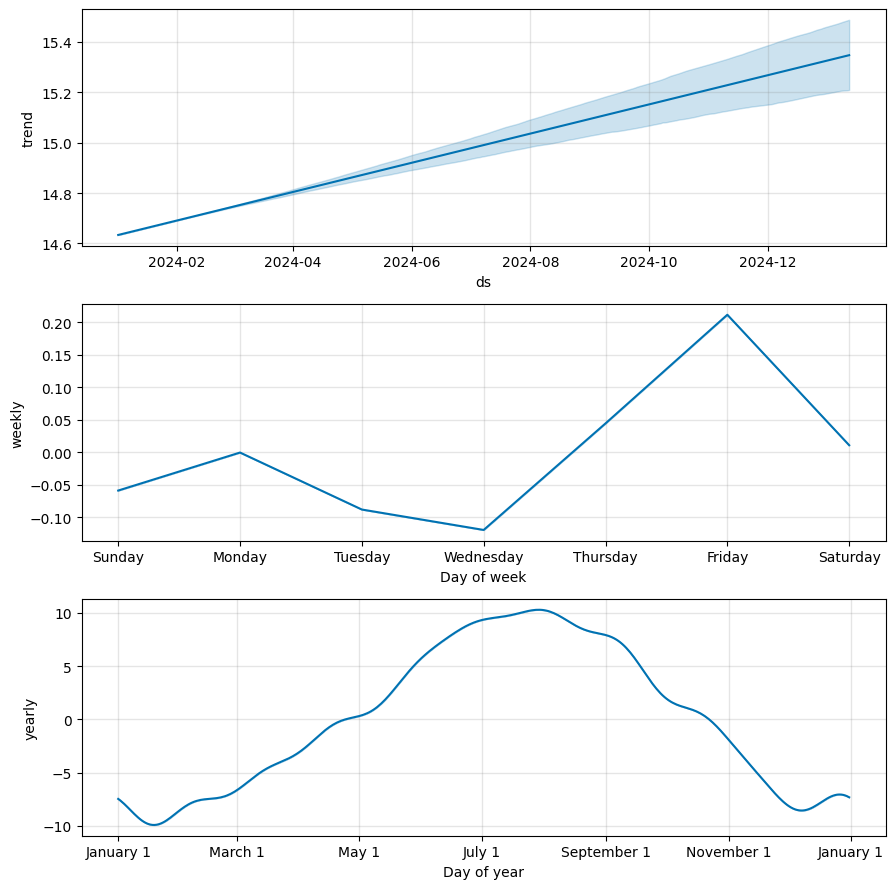

In [72]:
# Visualiser la décomposition saisonnière
model.plot_components(forecast)
plt.show()

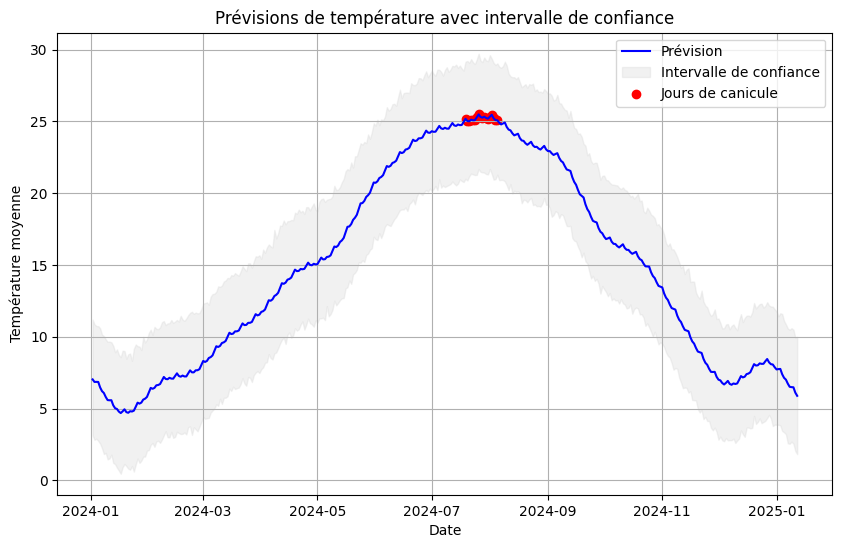

In [73]:
import matplotlib.pyplot as plt

# Créer un graphique pour visualiser les prédictions avec les limites supérieure et inférieure
plt.figure(figsize=(10, 6))

# Tracer la prévision de la température moyenne
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Prévision')

# Tracer les limites supérieure et inférieure
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.3, label='Intervalle de confiance')

# Ajouter les jours de canicule s'il y en a
if not jours_de_canicule.empty:
    plt.scatter(jours_de_canicule['ds'], jours_de_canicule['yhat'], color='red', label='Jours de canicule')

# Ajouter les labels et le titre
plt.xlabel('Date')
plt.ylabel('Température moyenne')
plt.title('Prévisions de température avec intervalle de confiance')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [74]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Suppose que cleaned_data et forecast sont déjà définis et contiennent les colonnes 'y' et 'yhat'
# Tronquer les séries à 377 valeurs
y_true = cleaned_data['y'][:377]
y_pred = forecast['yhat'][:377]

# Vérifier les longueurs après tronquage
print("Longueur de y_true:", len(y_true))
print("Longueur de y_pred:", len(y_pred))

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print("RMSE:", rmse)

Longueur de y_true: 377
Longueur de y_pred: 377
RMSE: 3.5393931331376773


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
